In [ ]:
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten
from tensorflow.keras.layers import MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow import keras


In [ ]:
import gdown

file_id = "1kXAc3BcHtWAARqW6gRYXEhKQrKfusneA"  # Extracted from the link
file_name = "plant_disease_merged.zip"  # Saving with the correct name

gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1kXAc3BcHtWAARqW6gRYXEhKQrKfusneA
From (redirected): https://drive.google.com/uc?id=1kXAc3BcHtWAARqW6gRYXEhKQrKfusneA&confirm=t&uuid=fbbdaa7e-3370-4e11-b75c-355194a15aaa
To: /content/plant_disease_merged.zip
100%|██████████| 2.19G/2.19G [00:34<00:00, 62.9MB/s]


'plant_disease_merged.zip'

In [ ]:
#zip file extraction

import zipfile
import os

with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall("/content/extracted1")  # Extract to a folder


In [ ]:
dataset_path ='/content/extracted1/plant_disease_merged'
batch = 32
img_size = 256
base_dir = dataset_path

In [ ]:
# generator is a function that yields batches of data instead of loading everything into memory at once.
#It is commonly used for handling large datasets efficiently.

# Load Training Dataset (80%)
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,                 # Ensures reproducibility in data splitting
    validation_split=0.2,     # 20% of the dataset is reserved for validation
    subset="training",        # Load only the training dataset (80%)
    batch_size=batch,         # Number of images per batch
    image_size=(img_size, img_size)  # Resize images to (img_size, img_size)
)

# Load Validation Dataset (20%)
validation_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,                 # Ensures reproducibility in data splitting
    validation_split=0.2,     # 20% of the dataset is reserved for validation
    subset="validation",      # Load only the validation dataset
    batch_size=batch,         # Number of images per batch
    image_size=(img_size, img_size)  # Resize images to (img_size, img_size)
)

Found 162916 files belonging to 38 classes.
Using 130333 files for training.
Found 162916 files belonging to 38 classes.
Using 32583 files for validation.


In [ ]:
def normalize(img, label):
  img = tf.cast(img, tf.float32) / 255.0  # Convert to float32 and scale
  return img, label

# Apply normalization to both datasets
train_ds = train_ds.map(normalize)
validation_ds = validation_ds.map(normalize)

In [ ]:
# Create CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu')) # here 32 filters are used wit each size 3*3
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(38, activation='softmax'))  # 38 classes → Softmax activation

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
  model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      14,746,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,906,598 (56.86 MB)

 Trainable params: 14,906,598 (56.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 203s 48ms/step - accuracy: 0.6096 - loss: 1.3718 - val_accuracy: 0.8304 - val_loss: 0.5353
Epoch 2/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 189s 46ms/step - accuracy: 0.9016 - loss: 0.3007 - val_accuracy: 0.9089 - val_loss: 0.2940
Epoch 3/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 201s 46ms/step - accuracy: 0.9488 - loss: 0.1523 - val_accuracy: 0.9068 - val_loss: 0.3285
Epoch 4/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 187s 46ms/step - accuracy: 0.9676 - loss: 0.1012 - val_accuracy: 0.9334 - val_loss: 0.2446
Epoch 5/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 187s 46ms/step - accuracy: 0.9746 - loss: 0.0834 - val_accuracy: 0.9299 - val_loss: 0.2728
Epoch 6/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 201s 46ms/step - accuracy: 0.9771 - loss: 0.0734 - val_accuracy: 0.9356 - val_loss: 0.2832
Epoch 7/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 186s 46ms/step - accuracy: 0.9803 - loss: 0.0648 - val_accuracy: 0.9485 - val_loss: 0.2484
Epoch 8/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 201s 45ms/step - accuracy: 

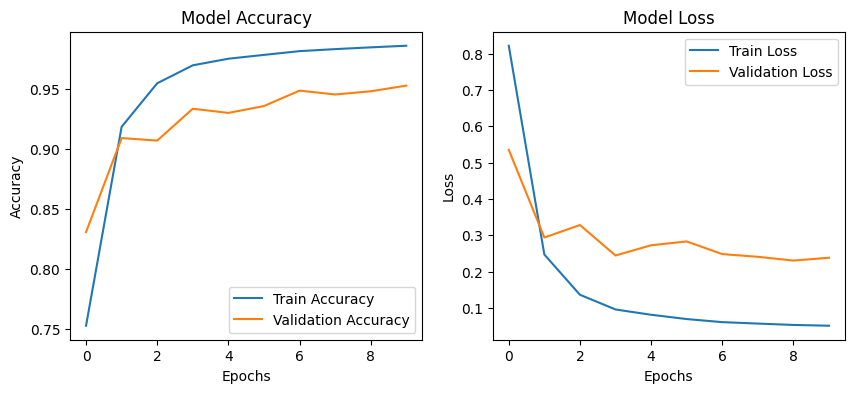

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()


In [ ]:
val_loss, val_acc = model.evaluate(validation_ds)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}"

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9524 - loss: 0.2373
Validation Loss: 0.2384, Validation Accuracy: 0.9526


Saving RS_Rust 1563.JPG to RS_Rust 1563.JPG
Image saved at: RS_Rust 1563.JPG


In [ ]:
# folder name set with folder number
import os

data_dir ='/content/extracted1/plant_disease_merged'
class_names = sorted(os.listdir(data_dir))  # Ensure a consistent order

# Create a mapping
class_to_index = {cls_name: i for i, cls_name in enumerate(class_names)}
index_to_class = {i: cls_name for cls_name, i in class_to_index.items()}
index_to_class


{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
from google.colab import files

# Upload image
uploaded = files.upload()

# Get the uploaded file name (path)
img_path = list(uploaded.keys())[0]

# Print the path
print(f"Image saved at: {img_path}")

Saving RS_Rust 1563.JPG to RS_Rust 1563 (1).JPG
Image saved at: RS_Rust 1563 (1).JPG


In [ ]:
#image pre-processing
from tensorflow.keras.preprocessing import image

img = image.load_img(img_path, target_size=(256, 256))  # Resize to model input size
img_array = image.img_to_array(img)  # Convert to NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize (if required)

#prediction = model.predict(img_array)
predicted_index = model.predict(img_array).argmax()  # Get the index of the highest probability
predicted_class = index_to_class[predicted_index]

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Corn_(maize)___Common_rust_


In [ ]:
model.save("dp001.1.h5")  # Saves in HDF5 format

# Saves in your Google Drive
# model.save("/content/drive/MyDrive/dp001.1.h5")

In [ ]:
#model.save("full_merged_data.keras")  # Saves in Keras format
model.save("/content/drive/MyDrive/full_merged_data.keras")

In [ ]:
#Hyper parameter tuning

In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()

    model.add(keras.layers.InputLayer(input_shape=(256, 256, 3)))  # Input Layer

    # Let KerasTuner decide the number of Conv layers (between 2 to 5)
    num_conv_layers = hp.Int('num_conv_layers', min_value=2, max_value=5)

    for i in range(num_conv_layers):
        model.add(Conv2D(
            filters=hp.Choice(f'conv_{i+1}_filters', [32, 64, 128]),
            kernel_size=(3,3),
            activation='relu'
        ))
        model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())  # Flatten before Fully Connected Layer

    # Dense Layer
    model.add(Dense(
        units=hp.Choice('dense_units', [256, 512, 1024]),
        activation='relu'
    ))

    # Dropout Layer
    model.add(Dropout(hp.Choice('dropout_rate', [0.2, 0.3, 0.5])))

    # Output Layer (38 Classes)
    model.add(Dense(38, activation='softmax'))

    # Compile Model
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
# Initialize KerasTuner (Random Search)
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=5,  # Test 5 different hyperparameter combinations
    executions_per_trial=1,  # Run each combination once
    directory='tuner_results',
    project_name='cnn_tuning'
)

# Start Hyperparameter Tuning Using Your Dataset
tuner.search(train_ds, validation_data=validation_ds, epochs=5)

# Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"✅ Best Number of Conv Layers: {best_hps.get('num_conv_layers')}")
print(f"✅ Best Filters: {[best_hps.get(f'conv_{i+1}_filters') for i in range(best_hps.get('num_conv_layers'))]}")
print(f"✅ Best Dense Neurons: {best_hps.get('dense_units')}")
print(f"✅ Best Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"✅ Best Optimizer: {best_hps.get('optimizer')}")


Trial 5 Complete [00h 19m 22s]
val_accuracy: 0.9551299810409546

Best val_accuracy So Far: 0.9551299810409546
Total elapsed time: 03h 29m 24s
✅ Best Number of Conv Layers: 3
✅ Best Filters: [32, 64, 32]
✅ Best Dense Neurons: 512
✅ Best Dropout Rate: 0.2
✅ Best Optimizer: adam


In [ ]:
# Build Model Using Best Hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train Model
history = best_model.fit(train_ds, validation_data=val_ds, epochs=10)


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

def build_model(hp):
    model = Sequential()

    # CNN Layers (Already Tuned)
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten Layer
    model.add(Flatten())

    # **Tuning Dense Layers**
    num_dense_layers = hp.Int('num_dense_layers', min_value=1, max_value=4, step=1)

    for i in range(num_dense_layers):
        model.add(Dense(hp.Int(f"dense_units_{i}", min_value=128, max_value=1024, step=128), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    # Output Layer (38 classes)
    model.add(Dense(38, activation='softmax'))

    # Compile Model (Fixed Optimizer = Adam)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,  # Defines how long each model will train
    factor=3,  # Controls how models are selected in Hyperband
    directory='my_tuning',
    project_name='cnn_dense_layers'
)

tuner.search(train_ds, validation_data=validation_ds, epochs=10)


Trial 16 Complete [00h 08m 29s]
val_accuracy: 0.9558358788490295

Best val_accuracy So Far: 0.9589049220085144
Total elapsed time: 02h 09m 53s

Search: Running Trial #17

Value             |Best Value So Far |Hyperparameter
1                 |1                 |num_dense_layers
1024              |1024              |dense_units_0
0.3               |0.3               |dropout_0
896               |896               |dense_units_1
0.3               |0.3               |dropout_1
128               |128               |dense_units_2
0.4               |0.4               |dropout_2
10                |4                 |tuner/epochs
4                 |2                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
2                 |1                 |tuner/round
0012              |0009              |tuner/trial_id
128               |128               |dense_units_3
0.4               |0.4               |dropout_3

Epoch 5/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 238s 58ms/step

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"✅ Best Number of Dense Layers: {best_hps.get('num_dense_layers')}")

for i in range(best_hps.get('num_dense_layers')):
    print(f"✅ Dense Layer {i+1} Neurons: {best_hps.get(f'dense_units_{i}')}")
    print(f"✅ Dropout Rate for Layer {i+1}: {best_hps.get(f'dropout_{i}')}")



In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import tensorflow as tf

def build_model(hp):
    model = Sequential()

    # CNN Layers (Fixed)
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten Layer
    model.add(Flatten())

    # Tune Dense Layers
    num_dense_layers = hp.Int('num_dense_layers', min_value=1, max_value=4, step=1)

    for i in range(num_dense_layers):
        model.add(Dense(hp.Int(f"dense_units_{i}", min_value=128, max_value=1024, step=128), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    # Output Layer (38 classes)
    model.add(Dense(38, activation='softmax'))

    # Compile Model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model




In [ ]:
# Define Keras Tuner with max 5 trials
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3  # Run only 5 trials
)

In [ ]:
tuner.search(train_ds, validation_data=validation_ds, epochs=5)

Trial 1 Complete [00h 19m 56s]
val_accuracy: 0.0973820686340332

Best val_accuracy So Far: 0.0973820686340332
Total elapsed time: 00h 19m 56s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
4                 |4                 |num_dense_layers
640               |768               |dense_units_0
0.3               |0.4               |dropout_0
128               |128               |dense_units_1
0.3               |0.2               |dropout_1
384               |128               |dense_units_2
0.3               |0.2               |dropout_2
896               |128               |dense_units_3
0.2               |0.2               |dropout_3

Epoch 1/5
 212/4073 ━━━━━━━━━━━━━━━━━━━━ 3:06 48ms/step - accuracy: 0.0977 - loss: 3.4132

KeyboardInterrupt: 

In [ ]:
# new model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Initialize the model
model = Sequential()

# CNN Layers (Fixed)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model.add(Flatten())

# Tuned Dense Layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(896, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

# Output Layer (38 classes)
model.add(Dense(38, activation='softmax'))



In [ ]:
# Compile Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1024)                │      29,492,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 896)                 │         918,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 896)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         114,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,584,710 (116.67 MB)

 Trainable params: 30,584,710 (116.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 254s 61ms/step - accuracy: 0.0989 - loss: 3.3752 - val_accuracy: 0.0974 - val_loss: 3.3468
Epoch 2/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 224s 55ms/step - accuracy: 0.1010 - loss: 3.3461 - val_accuracy: 0.0974 - val_loss: 3.3462
Epoch 3/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 225s 55ms/step - accuracy: 0.1006 - loss: 3.3444 - val_accuracy: 0.0974 - val_loss: 3.3461
Epoch 4/10
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 261s 55ms/step - accuracy: 0.1001 - loss: 3.3437 - val_accuracy: 0.0974 - val_loss: 3.3456
Epoch 5/10
2311/4073 ━━━━━━━━━━━━━━━━━━━━ 1:28 50ms/step - accuracy: 0.1023 - loss: 3.3409

KeyboardInterrupt: 